## Business Case:- To predict whether a person will have diabetes or not.

In [78]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load the data
data=pd.read_csv(r'C:\Users\Ai_engineer_course\MLA-2 Logistic Regression-20240621T165128Z-001\MLA-2 Logistic Regression\diabetes1.csv')

### Basic Checks 

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Exploratory Data Analysis

In [7]:
#Step 1 Univariate Analysis
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='count'>

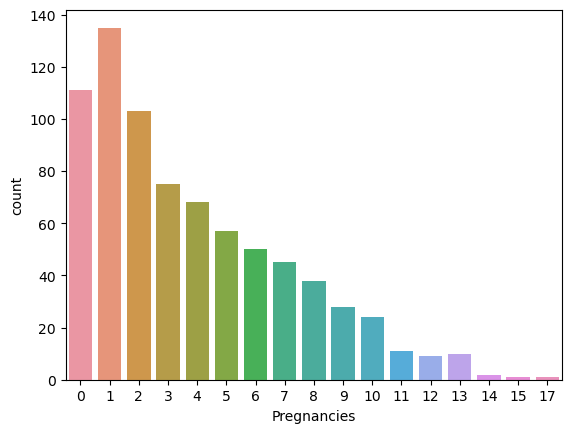

In [8]:
sns.countplot(x='Pregnancies',data=data)
# Maximum patients have conceived  1 and 0 times.

In [9]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

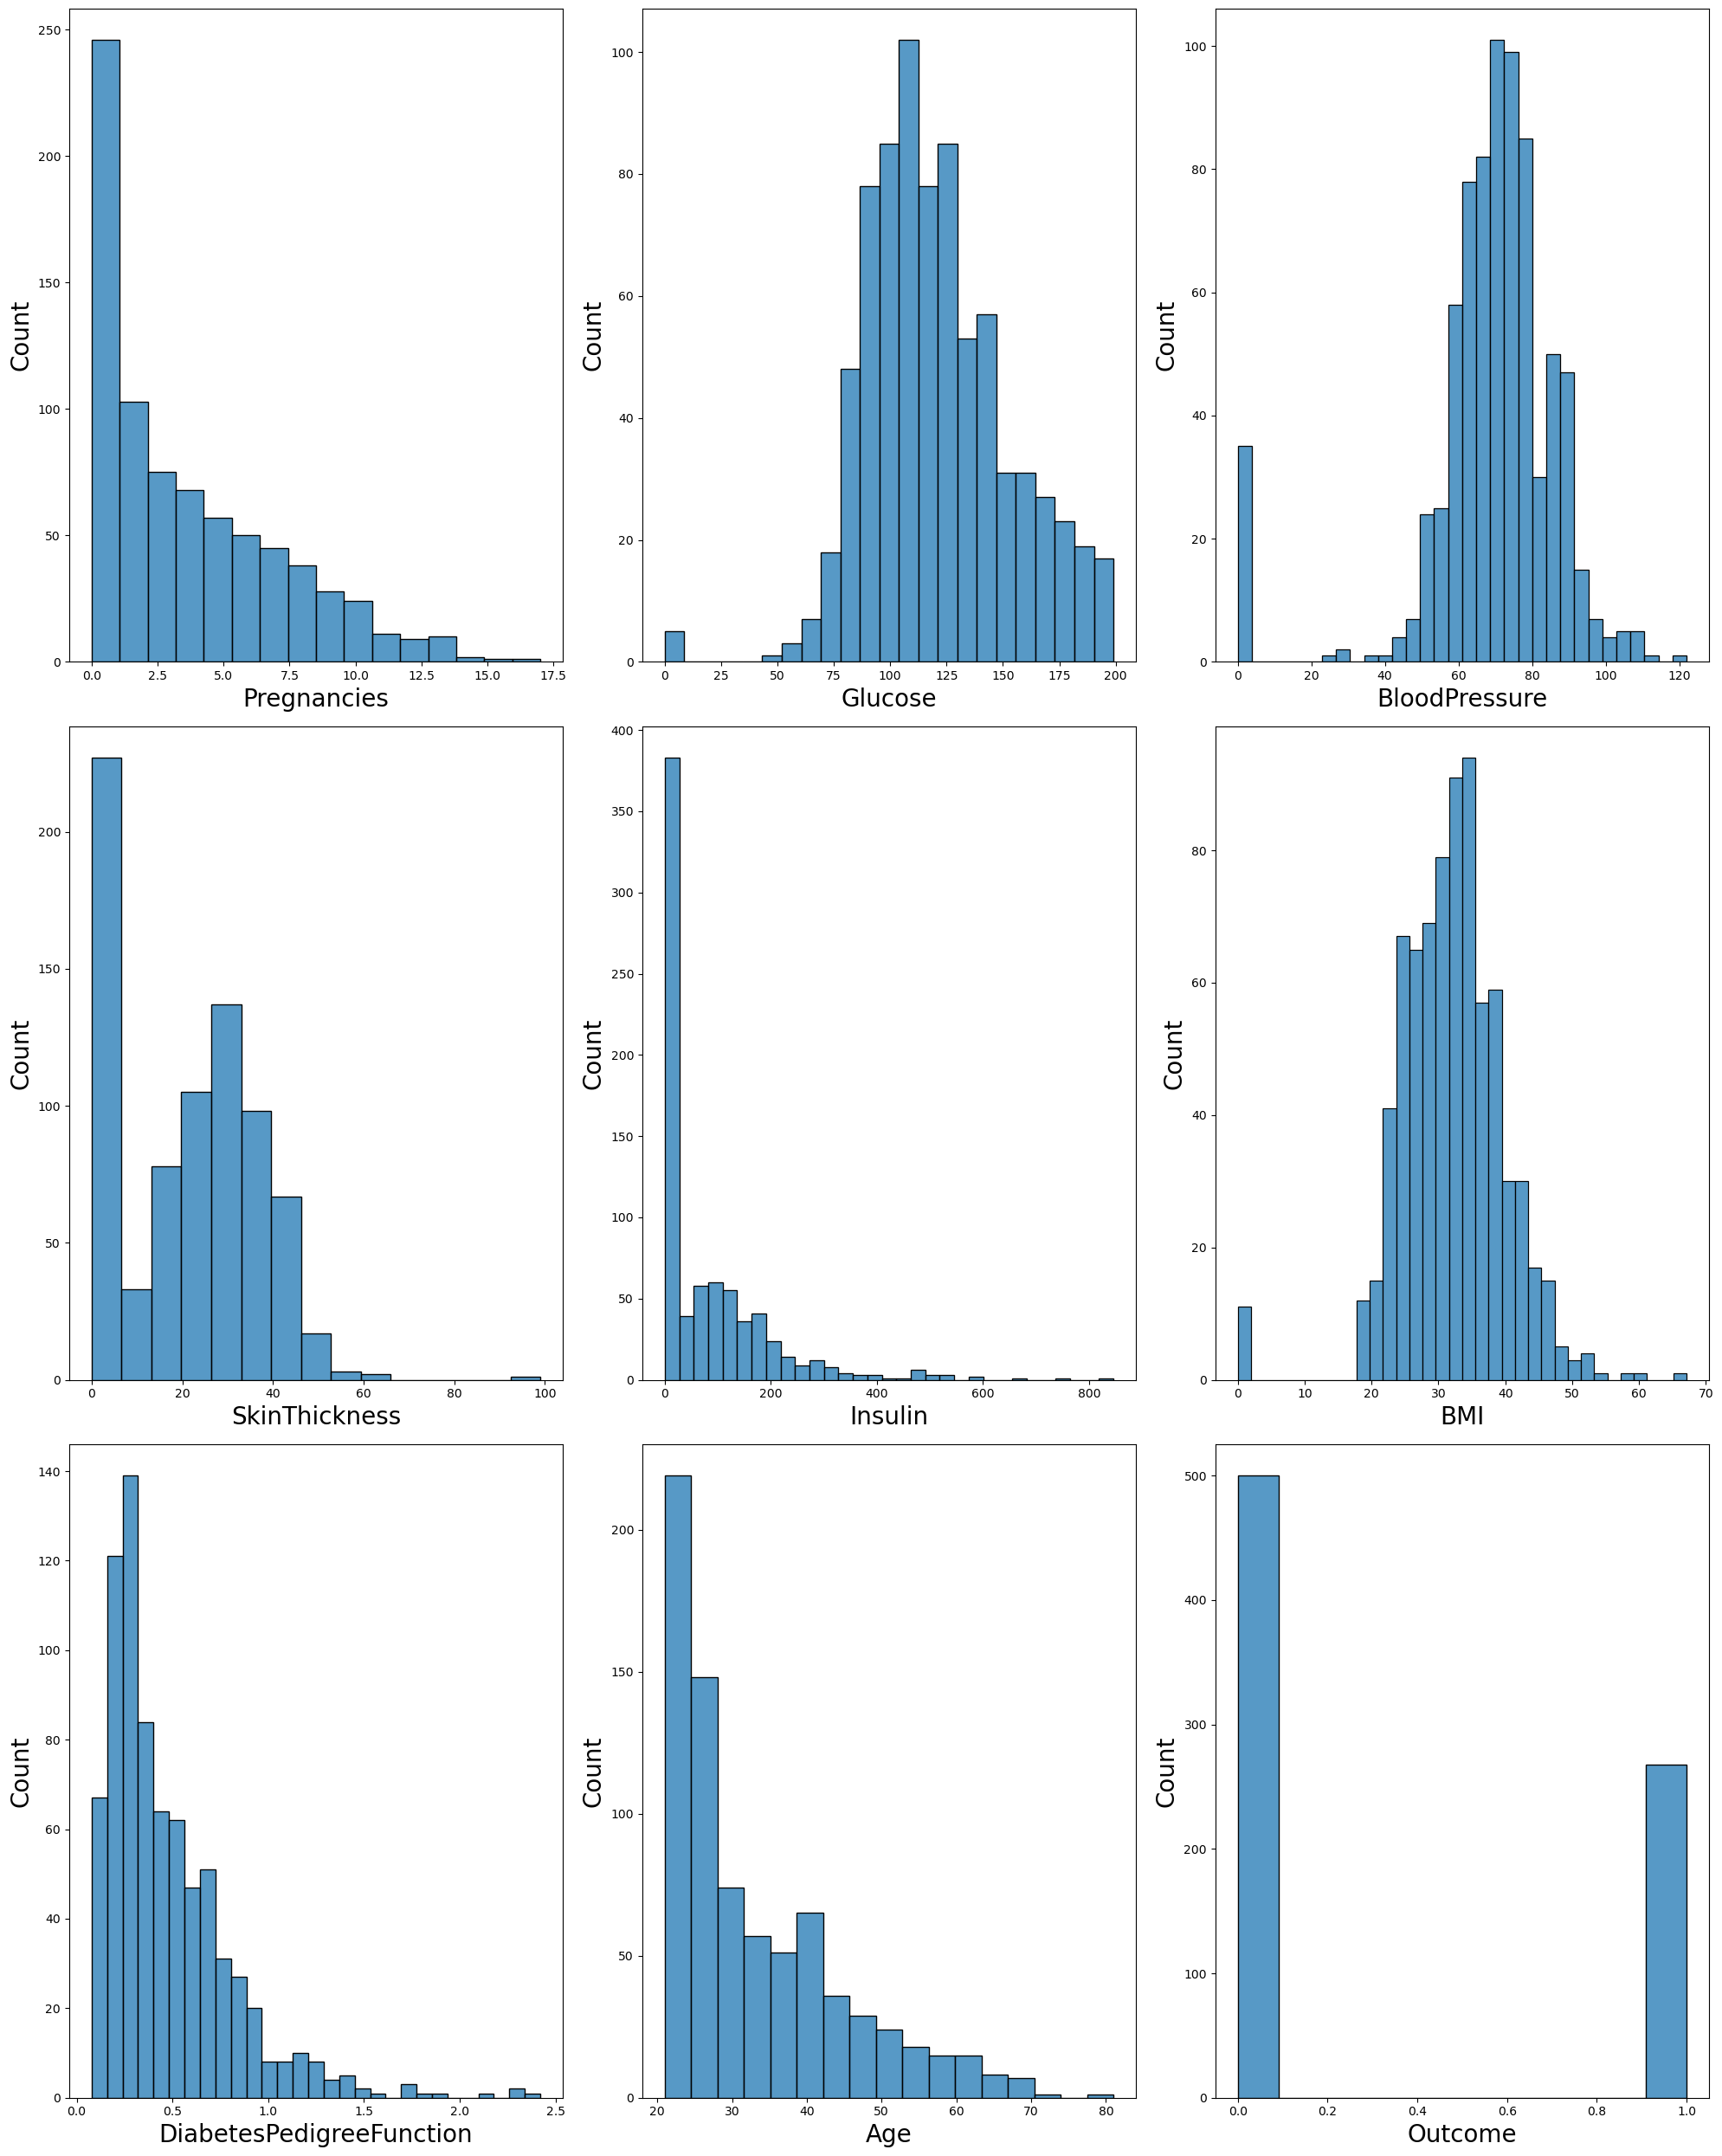

In [12]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    plt.subplot(3,3,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

In [14]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


<Axes: xlabel='Glucose', ylabel='Count'>

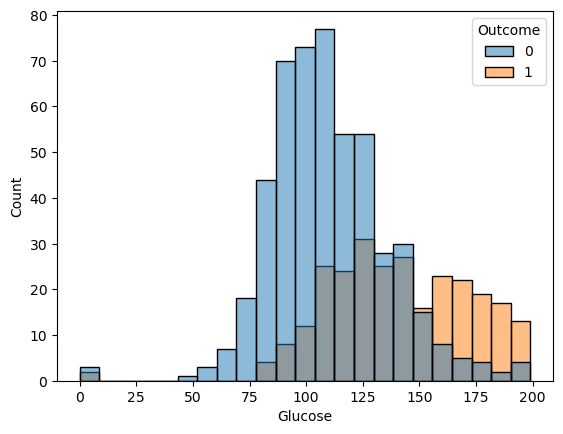

In [18]:
## Aanlyzing the relationship between diabetes and Glucose
sns.histplot(x='Glucose',hue='Outcome',data=data)

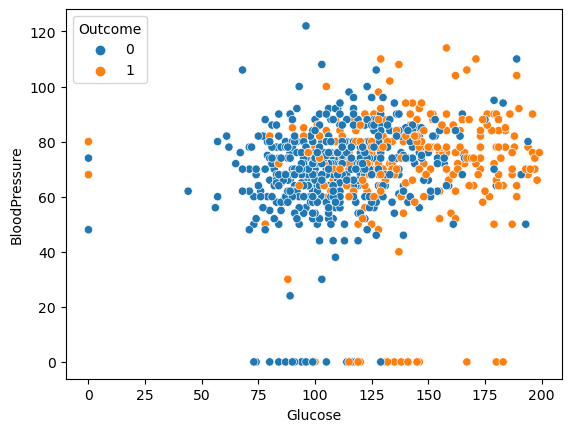

In [19]:
## Analyze Glucose with blood pressure

sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

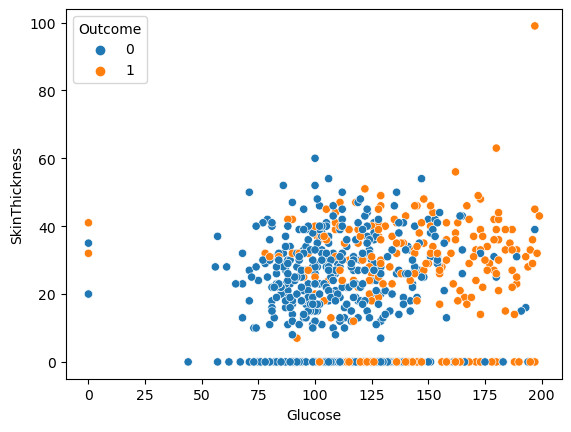

In [20]:
## Analyze Glucose with SkinThickness

sns.scatterplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

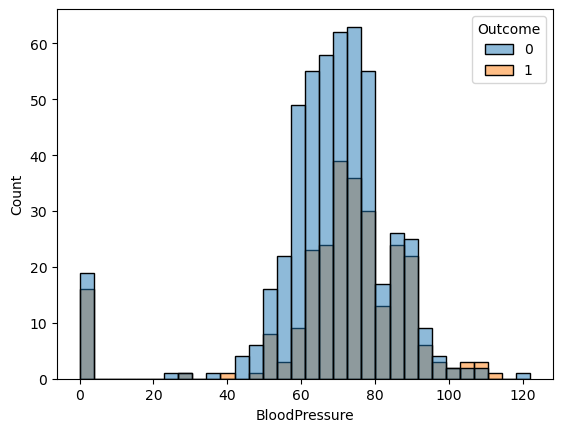

In [21]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=data)

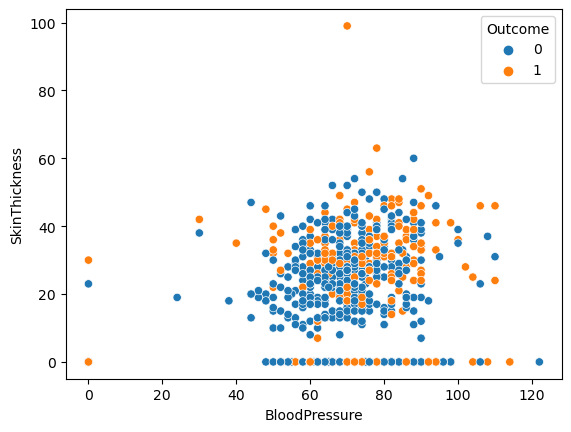

In [22]:
## Analyze BP with SkinThickness

sns.scatterplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

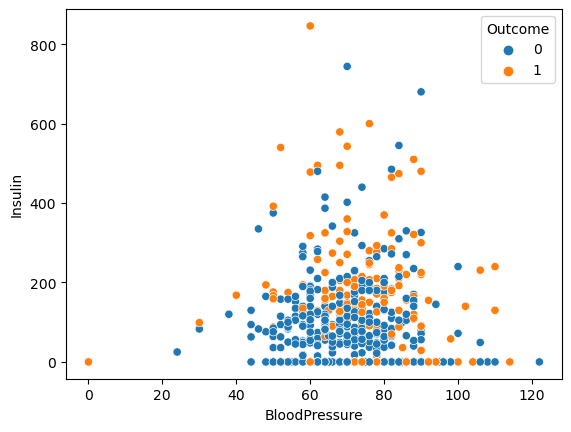

In [23]:
## Analyze BP with Insulin

sns.scatterplot(x='BloodPressure',y='Insulin',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

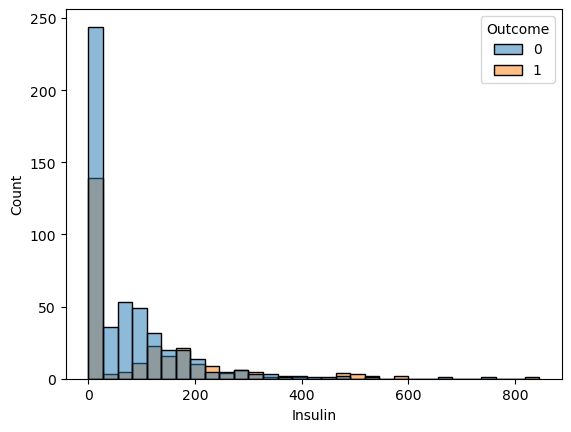

In [24]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

## Data Preprocessing and Feature Engineering.

In [25]:
#Step 1 Handling the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
# Filtering Glucose = 0
data[data["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [26]:
# Filtering Glucose = 0
data[data["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [27]:
print("Mean value of Glucose",np.mean(data.Glucose))
print("Median value of Glucose",np.median(data.Glucose))

Mean value of Glucose 120.89453125
Median value of Glucose 117.0


In [28]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data.Glucose.replace(0,np.mean(data.Glucose),inplace=True)

#dataframe.colum.replace('Value to be replaced','By what value')

In [30]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [31]:
## Step 3:- Numerical representation of categorical data

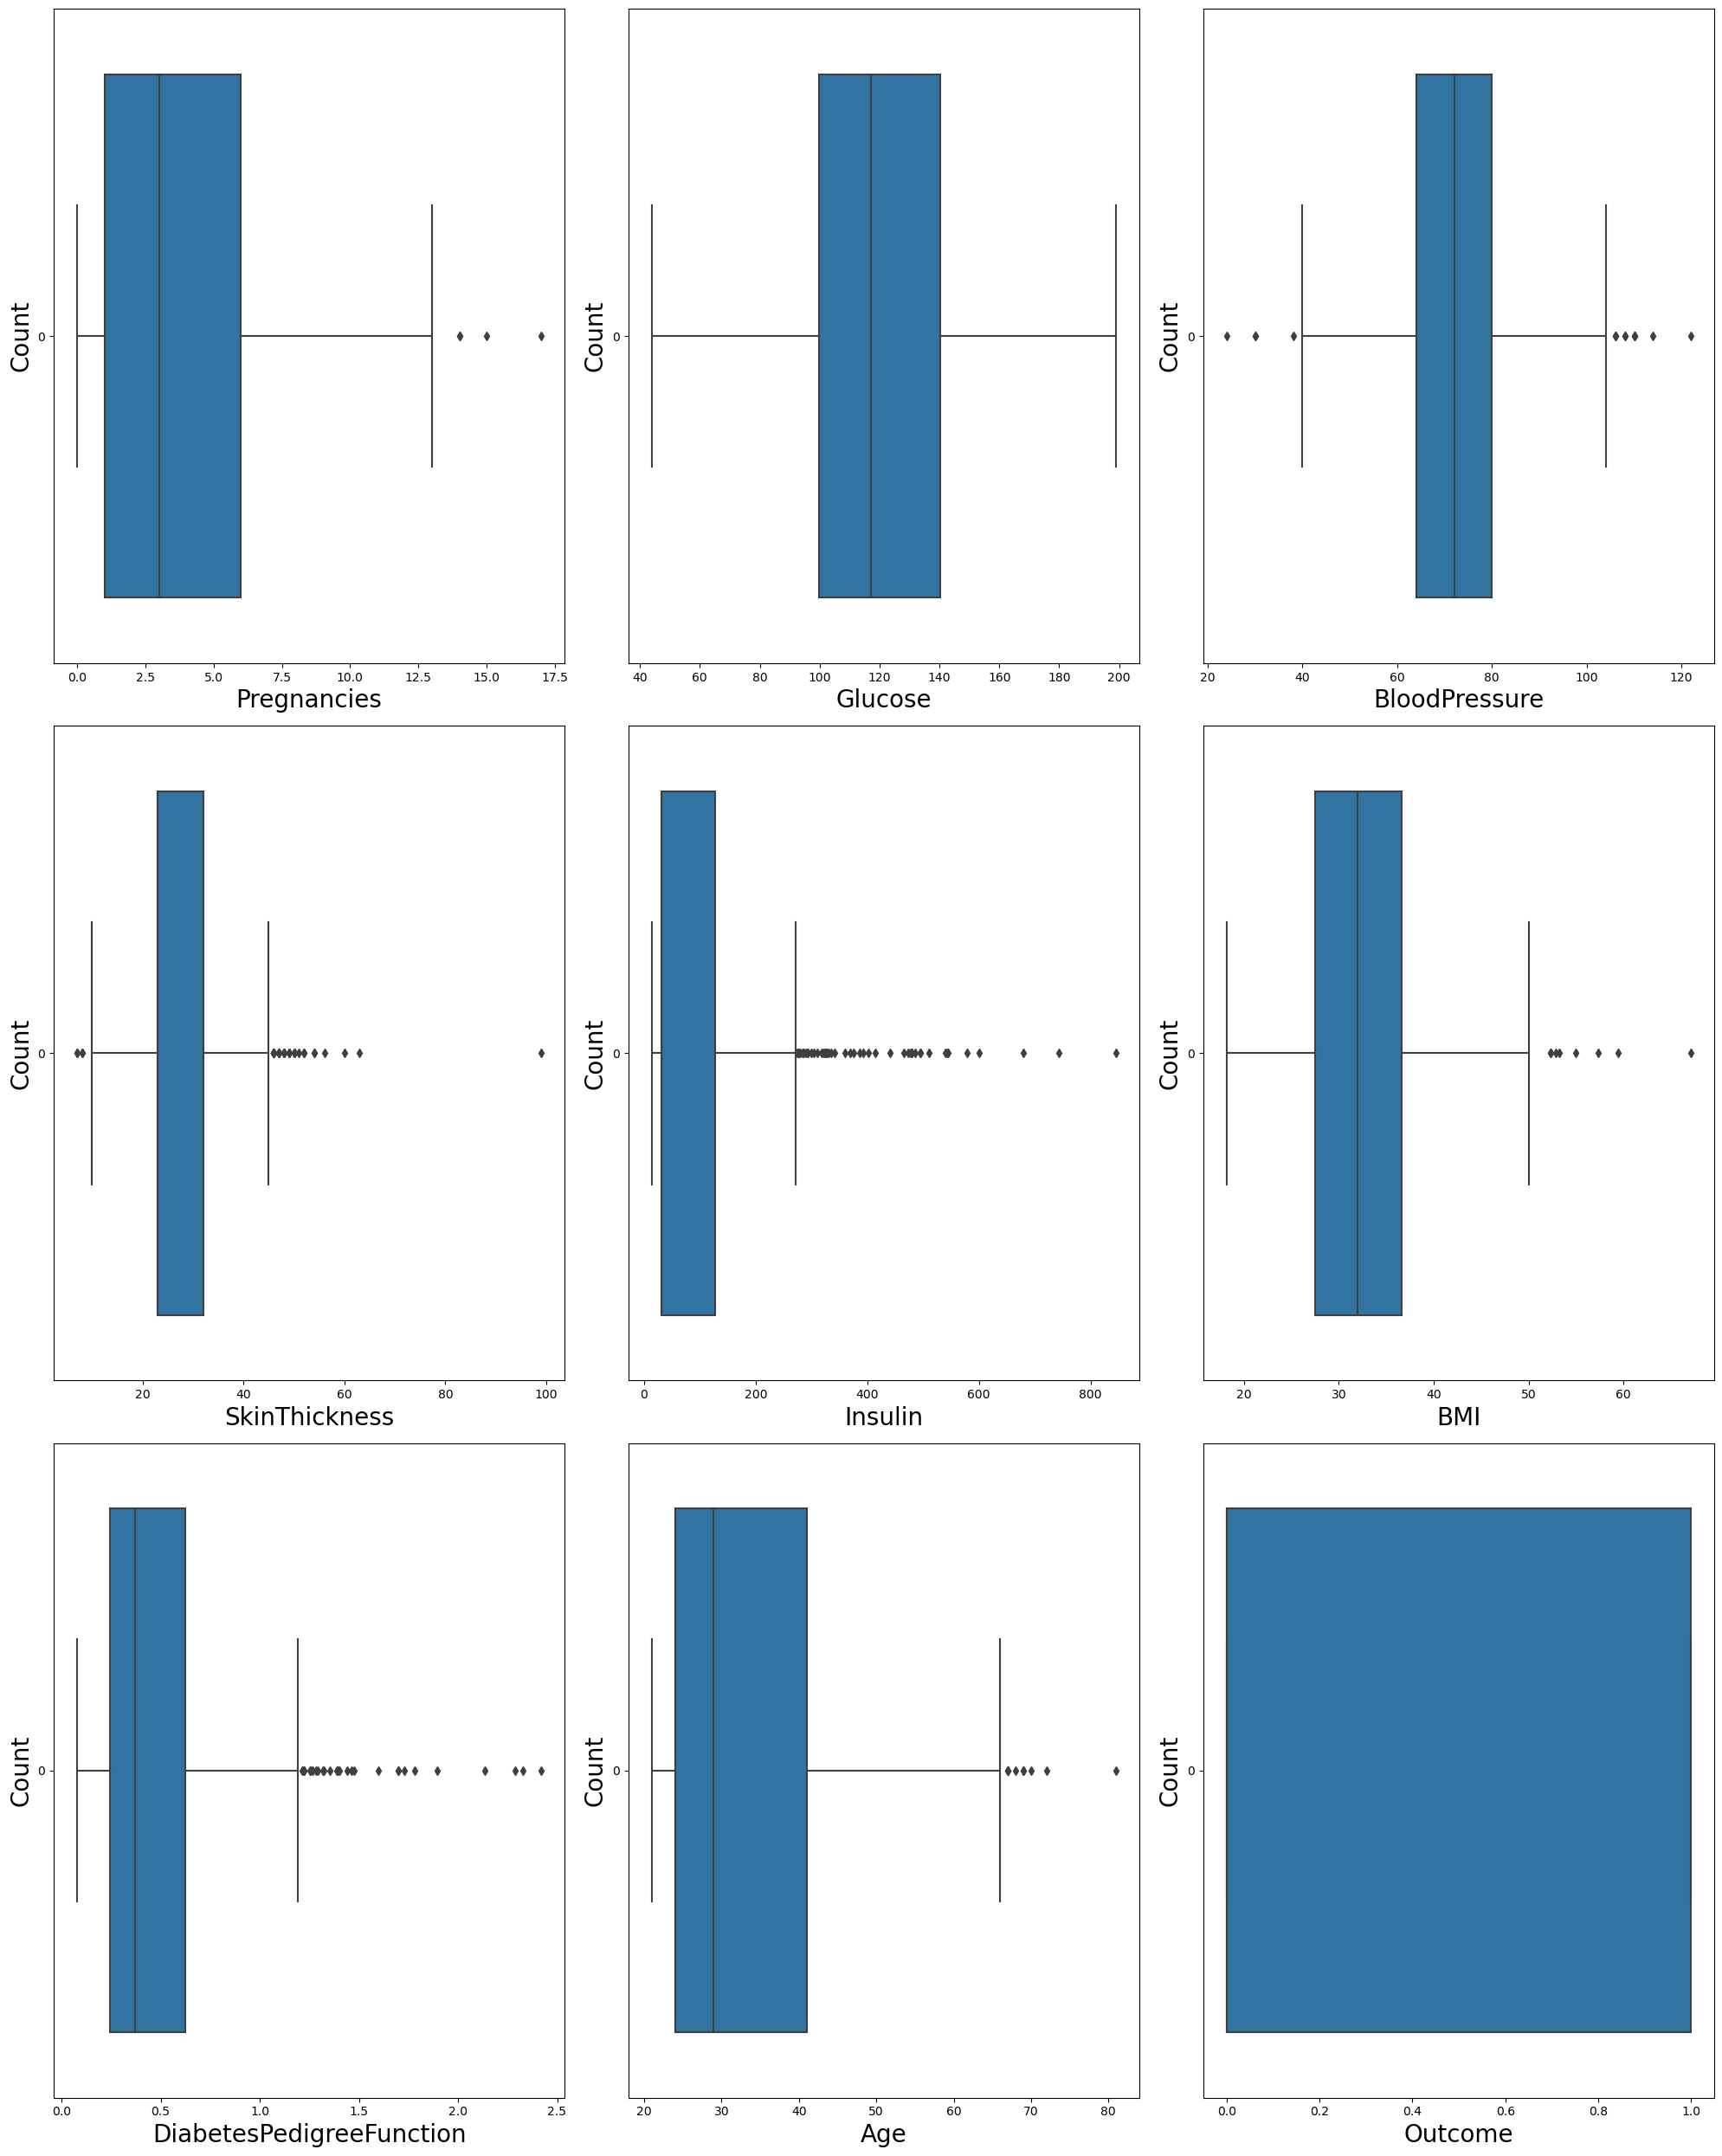

In [32]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(data[column],orient="h")
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


In [35]:
## Step 5:-Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler() #Object Creation
data1=sc.fit_transform(data.drop(['Pregnancies','Outcome'],axis=1))

In [36]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [37]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
data2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [38]:
data[['Pregnancies','Outcome']]

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [39]:
final_df=pd.concat([data2,data[['Pregnancies','Outcome']]],axis=1)

In [40]:
final_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1


## Feature  Selection

<Axes: >

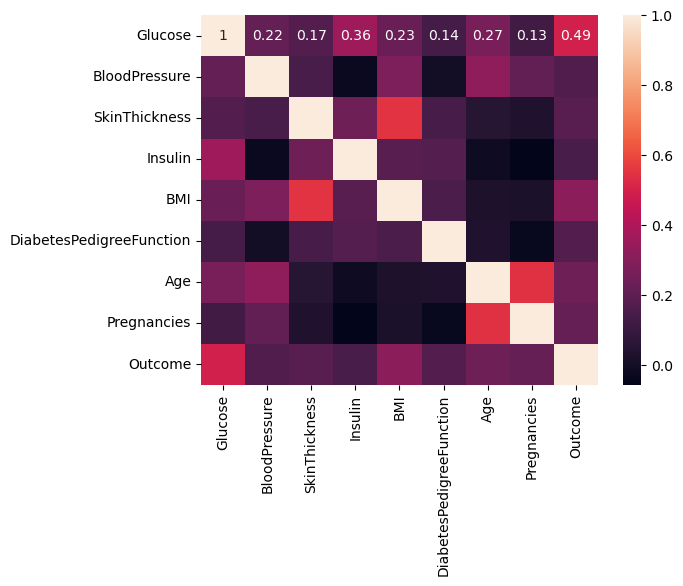

In [41]:
## No redundant fetaures
## We will check correlation
sns.heatmap(final_df.corr(),annot=True)
# So no correlation hence no features should be removed.

## Logistic Regression Classification Model Creation

In [43]:
## Step 1 Creating independent and dependent variable.
X=final_df.iloc[:,:-1]
y=final_df.Outcome

In [44]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0
...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1


In [45]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [46]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=24)

In [47]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression() #Object
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [48]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [49]:
y_pred #Prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
y_test #Actual

313    0
99     1
550    0
334    0
211    0
      ..
102    0
118    0
52     0
589    0
49     0
Name: Outcome, Length: 192, dtype: int64

In [51]:
y_pred_prob=clf.predict_proba(X_test)

In [52]:
y_pred_prob

array([[0.80160025, 0.19839975],
       [0.59138879, 0.40861121],
       [0.87241834, 0.12758166],
       [0.93781385, 0.06218615],
       [0.52944165, 0.47055835],
       [0.84393902, 0.15606098],
       [0.81075224, 0.18924776],
       [0.84851607, 0.15148393],
       [0.43587573, 0.56412427],
       [0.82210345, 0.17789655],
       [0.91329444, 0.08670556],
       [0.93858066, 0.06141934],
       [0.67225476, 0.32774524],
       [0.8225773 , 0.1774227 ],
       [0.81136191, 0.18863809],
       [0.82511623, 0.17488377],
       [0.86217167, 0.13782833],
       [0.91601763, 0.08398237],
       [0.83467858, 0.16532142],
       [0.85127312, 0.14872688],
       [0.74976706, 0.25023294],
       [0.13115102, 0.86884898],
       [0.82201058, 0.17798942],
       [0.90078695, 0.09921305],
       [0.86714264, 0.13285736],
       [0.24940574, 0.75059426],
       [0.78572352, 0.21427648],
       [0.43158397, 0.56841603],
       [0.93508438, 0.06491562],
       [0.17315039, 0.82684961],
       [0.

In [53]:
y_train.value_counts()

Outcome
0    376
1    200
Name: count, dtype: int64

## Evaluation of Model

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [55]:
cm=confusion_matrix(y_test,y_pred) #Actual Prediction
print(cm)

[[108  16]
 [ 41  27]]


In [56]:
accu = accuracy_score(y_test,y_pred)
accu # We won't consider the accuracy because data is imbalanced.

0.703125

In [57]:
recall=recall_score(y_test,y_pred)
recall

0.39705882352941174

In [58]:
precision=precision_score(y_test,y_pred)
precision

0.627906976744186

In [59]:
f1score=f1_score(y_test,y_pred)
f1score

0.48648648648648646

In [60]:
cr=classification_report(y_test,y_pred) #Actual Prediction
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       124
           1       0.63      0.40      0.49        68

    accuracy                           0.70       192
   macro avg       0.68      0.63      0.64       192
weighted avg       0.69      0.70      0.68       192



## Decision Tree Classification

In [63]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

In [65]:
## Balacing the data
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print("Before SMOTE\n",y_train.value_counts())
X_train,y_train=sm.fit_resample(X_train,y_train)#applying sampling on target variable 
print("After SMOTE\n",y_train.value_counts())

Before SMOTE
 Outcome
0    401
1    213
Name: count, dtype: int64
After SMOTE
 Outcome
0    401
1    401
Name: count, dtype: int64


In [66]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#predicting testing data to check testing performance

In [67]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance 

## Evalaution of model

In [68]:
from sklearn.metrics import classification_report#importing mertics to check model performance

In [69]:
#Training
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       401

    accuracy                           1.00       802
   macro avg       1.00      1.00      1.00       802
weighted avg       1.00      1.00      1.00       802



In [70]:
#Testing 
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        99
           1       0.52      0.56      0.54        55

    accuracy                           0.66       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.66      0.66      0.66       154



## Ramdom Forest Classification

In [72]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.258065,0.489796,0.173913,0.019832,0.282209,0.096499,0.000000,2
1,0.438710,0.591837,0.184783,0.019832,0.204499,0.514091,0.483333,9
2,0.612903,0.224490,0.130435,0.082933,0.214724,0.245944,0.016667,1
3,0.754839,0.265306,0.173913,0.019832,0.075665,0.075149,0.733333,0
4,0.580645,0.571429,0.326087,0.427885,0.572597,0.068318,0.416667,6


In [73]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=50)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier(n_estimators=50)

In [74]:
y_predict=rf_clf.predict(X_test)#Prediction for testing data

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        99
           1       0.64      0.76      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



In [76]:
y_predict1=rf_clf.predict(X_train)#Prediction for training data

In [77]:
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       401

    accuracy                           1.00       802
   macro avg       1.00      1.00      1.00       802
weighted avg       1.00      1.00      1.00       802

